In [20]:
import kagglehub
patriciabrezeanu_movielens_full_25_million_recommendation_data_path = kagglehub.dataset_download('patriciabrezeanu/movielens-full-25-million-recommendation-data')

print('Data source import complete.')
print(patriciabrezeanu_movielens_full_25_million_recommendation_data_path)



Data source import complete.
/kaggle/input/movielens-full-25-million-recommendation-data


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
movie = pd.read_csv('/root/.cache/kagglehub/datasets/patriciabrezeanu/movielens-full-25-million-recommendation-data/versions/1/ml-25m/movies.csv')

In [23]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [24]:
movie = movie[movie.genres!='(no genres listed)']
movie = movie[:20000]

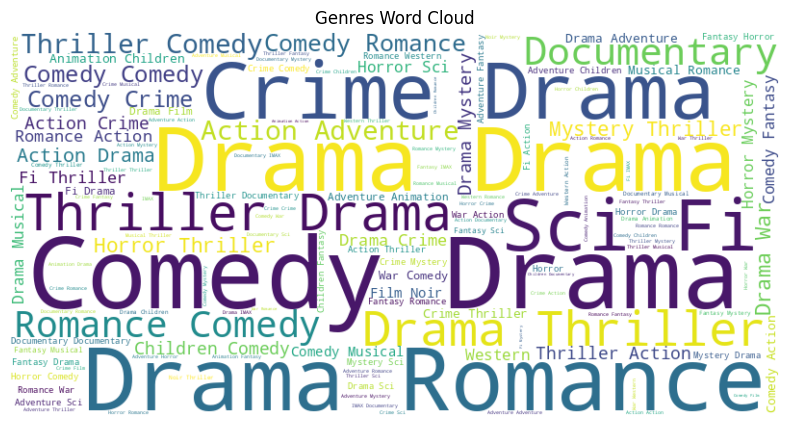

In [25]:
genre = movie.genres.str.replace('|', ' ', regex=False)

genre_join = ' '.join(genre)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_join)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genres Word Cloud')
plt.savefig('genre_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(movie['genres'])

tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war',
       'western'], dtype=object)

In [27]:
tfidf_matrix = tf.fit_transform(movie['genres'])

tfidf_matrix.shape

(20000, 21)

In [28]:
tfidf_matrix.todense()[0]

matrix([[0.        , 0.40771414, 0.54288335, 0.50392737, 0.25307822,
         0.        , 0.        , 0.        , 0.47016535, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ]])

In [29]:
movie[:100]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
95,97,"Hate (Haine, La) (1995)",Crime|Drama
96,98,Shopping (1994),Action|Thriller
97,99,Heidi Fleiss: Hollywood Madam (1995),Documentary
98,100,City Hall (1996),Drama|Thriller


In [30]:
mat=pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movie.title
)#.sample(22, axis=1).sample(10, axis=0)

In [31]:
mat[mat.crime>0]

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,horror,imax,musical,mystery,noir,romance,sci,thriller,war,western
title,,,,,,,,,,,,,,,,,,,,,
Heat (1995),0.585578,0.0,0.0,0.0,0.000000,0.603031,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.541712,0.0,0.0
Casino (1995),0.000000,0.0,0.0,0.0,0.000000,0.888097,0.0,0.459655,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
Money Train (1995),0.520880,0.0,0.0,0.0,0.362887,0.536405,0.0,0.277628,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.481860,0.0,0.0
Get Shorty (1995),0.000000,0.0,0.0,0.0,0.449551,0.664507,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.596937,0.0,0.0
Copycat (1995),0.000000,0.0,0.0,0.0,0.000000,0.460054,0.0,0.238111,0.0,0.0,...,0.490479,0.0,0.0,0.565940,0.0,0.000000,0.0,0.413274,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Life Without Dick (2002),0.000000,0.0,0.0,0.0,0.453221,0.669932,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.588032,0.0,0.000000,0.0,0.0
Passion (2012),0.000000,0.0,0.0,0.0,0.000000,0.527916,0.0,0.273235,0.0,0.0,...,0.000000,0.0,0.0,0.649421,0.0,0.000000,0.0,0.474235,0.0,0.0
Cottage Country (2013),0.626733,0.0,0.0,0.0,0.436633,0.645412,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [32]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.8007678 , 0.15449471, ..., 0.        , 0.        ,
        0.        ],
       [0.8007678 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15449471, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.49922583,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.49922583, 1.        ,
        0.49922583],
       [0.        , 0.        , 0.        , ..., 1.        , 0.49922583,
        1.        ]])

In [33]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie['title'], columns=movie['title'])
print('shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

shape: (20000, 20000)


title,Where Sleeping Dogs Lie (1992),Martin Lawrence: You So Crazy (1994),Decoy (1946),Adrift in Tokyo (Tenten) (2007),Scorchers (1991)
title,,,,,
"Last Airbender, The (2010)",0.000000,0.000000,0.000000,0.000000,0.000000
"Keys to the House, The (Chiavi di casa, Le) (2004)",0.000000,0.000000,0.199494,0.607624,0.607624
Trust (2010),0.000000,0.000000,0.099593,0.303342,0.303342
"Oh, God! (1977)",0.000000,0.242986,0.000000,0.376441,0.376441
Hardcore (2004),0.888097,0.000000,0.434008,0.279298,0.279298
"Dream of Light (a.k.a. Quince Tree Sun, The) (Sol del membrillo, El) (1992)",0.000000,0.780967,0.082891,0.252472,0.252472
Repo Man (1984),0.000000,0.190224,0.000000,0.294700,0.294700
Holy Wars (2010),0.000000,0.858593,0.000000,0.000000,0.000000
Sour Grapes (1998),0.000000,0.512658,0.000000,0.794224,0.794224


In [34]:
def movie_recomendations(movie_title, similarity_data=cosine_sim_df, items=movie[['title', 'genres']], k=5):

    index = similarity_data.loc[:,movie_title].to_numpy().argpartition(
        range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(movie_title, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [35]:
print(movie[movie.title=='Toy Story (1995)'])
movie_recomendations('Toy Story (1995)')

   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy


,title,genres
0,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy
1,Asterix and the Vikings (Astérix et les Viking...,Adventure|Animation|Children|Comedy|Fantasy
2,DuckTales: The Movie - Treasure of the Lost La...,Adventure|Animation|Children|Comedy|Fantasy
3,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
4,"Wild, The (2006)",Adventure|Animation|Children|Comedy|Fantasy


In [36]:
print(movie[movie.title=='Waiting to Exhale (1995)'])
movie_recomendations('Waiting to Exhale (1995)')

   movieId                     title                genres
3        4  Waiting to Exhale (1995)  Comedy|Drama|Romance


,title,genres
0,Kal Ho Naa Ho (2003),Comedy|Drama|Romance
1,Walking and Talking (1996),Comedy|Drama|Romance
2,Creator (1985),Comedy|Drama|Romance
3,Racing with the Moon (1984),Comedy|Drama|Romance
4,Last Holiday (1950),Comedy|Drama|Romance
